In [8]:
import pickle
import numpy as np

In [3]:
actions_path = "/Users/blazdobravec/Documents/FACULTY/DOC/RW1/INITIAL_RESEARCH/RL_self_driving_car/interestingness/saves/seq-a-table_pads2.pickle"
states_path = "/Users/blazdobravec/Documents/FACULTY/DOC/RW1/INITIAL_RESEARCH/RL_self_driving_car/interestingness/saves/seq-s-table_pads2.pickle"

In [29]:
# read pickle files
with open(actions_path, 'rb') as f:
    actions = pickle.load(f)
    og_actions = [episode[1:] for episode in actions]

with open(states_path, 'rb') as f:
    states = pickle.load(f)
    # remove first state from each episode
    og_states = [episode[1:] for episode in states]

In [30]:
def normalize_state_space(states):
    """
    Normalizes the state space.
    """
    normalized_states = []
    for episode_states in states:
        normalized_episode_states = []
        for state in episode_states:
            max_sensor = max(state[0] - min(state[0]))
            # set to absolute value
            state[0] = state[0] - min(state[0])
            # normalize numpy array state 
            normalized_state = state[0] / max_sensor
            normalized_episode_states.append(normalized_state)
        normalized_states.append(normalized_episode_states)
    return normalized_states
    
def discretize_state_space(all_states, precision):
    """
    Discretizes the state space with a given precision.
    """
    discretized_states = []
    for episode_states in all_states:
        episode_disc_states = np.round_(episode_states, decimals = precision, out = None)
        discretized_states.append(episode_disc_states)
    return discretized_states


def get_state_freq_dist(discretized_states):
    """
    Gets the state frequency distribution.
    """
    state_freq_dct = {}
    for episode_states in discretized_states:
        for states in episode_states:
            if states[0] == []:
                continue
            tup = tuple(states[0])
            state_freq_dct[tup] = state_freq_dct.get(tup, 0) + 1
    return state_freq_dct

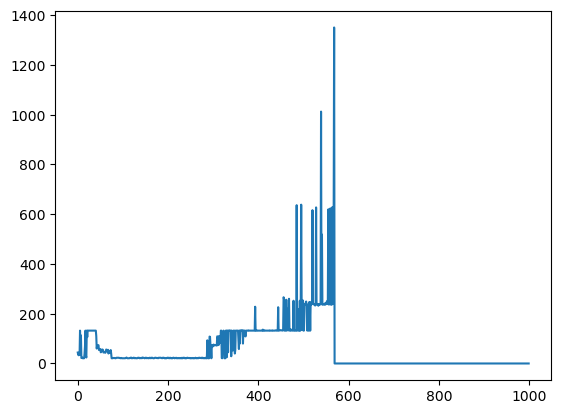

In [31]:
# plot length of action_episodes
import matplotlib.pyplot as plt
plt.plot([len(episode) for episode in states])
plt.show()

In [32]:
print(og_states[0][0])
normalised_states = normalize_state_space(og_states)
print(normalised_states[0][0])
dicreticised_states = discretize_state_space(og_states, 2)
print(dicreticised_states[0][0])
freq_dct = get_state_freq_dist(dicreticised_states)

[[-2.38367561 -1.20849969 -0.30153855 -1.55092092 -2.64205151]]
[0.11039285 0.61249471 1.         0.46619293 0.        ]
[[0.26 1.43 2.34 1.09 0.  ]]


/var/folders/5l/_0j09j5n0gg7s_98h1l1nvw40000gn/T/ipykernel_46838/2872260920.py:35: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if states[0] == []:


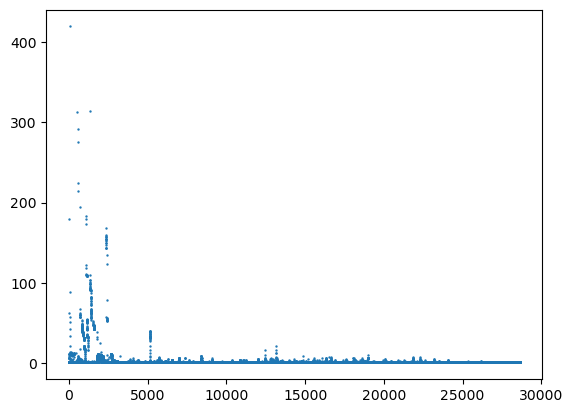

In [33]:
key_map = []
X = []
Y = []
for i, (key, values) in enumerate(freq_dct.items()):
    key_map.append((i, key))
    X.append(i)
    Y.append(values)

plt.scatter(X,Y, s=0.5)

In [39]:
final_actions = og_actions[568]

In [41]:
# running average of 20 and then chose the one that occurs the most frequent


[0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [9]:
games_path = "recorded_game.pkl"
with open(games_path, 'rb') as f:
    actions_and_states = pickle.load(f)


In [10]:
actions_and_states = actions_and_states[1:]

In [11]:
# get first element of each tuple
actions = [action for action, state in actions_and_states]

In [12]:
left_turning = actions_and_states[85:110]
left_turning[-1] = (1, left_turning[-1][1])
right_turning = actions_and_states[125:150]
straight = actions_and_states[550:575]

In [13]:
# get second element of each tuple
left_turning_states = [state for action, state in left_turning]
right_turning_states = [state for action, state in right_turning]
straight_states = [state for action, state in straight]

In [14]:
straight_states

[array([[-2.70685575, -1.49417324, -0.62488779, -1.13116693, -2.06693489]]),
 array([[-2.7086936 , -1.49513351, -0.63480484, -1.13060032, -2.06585374]]),
 array([[-2.71053395, -1.49609502, -0.64504173, -1.13003429, -2.06477371]]),
 array([[-2.7123768 , -1.49705776, -0.65561419, -1.12946882, -2.06369482]]),
 array([[-2.71422215, -1.49802175, -0.666539  , -1.12890392, -2.06261705]]),
 array([[-2.71607002, -1.49898697, -0.67783407, -1.12833958, -2.0615404 ]]),
 array([[-2.71792041, -1.49995344, -0.68951855, -1.1277758 , -2.06046488]]),
 array([[-2.71977332, -1.50092116, -0.70161293, -1.12721259, -2.05939048]]),
 array([[-2.72162876, -1.50189013, -0.71413916, -1.12664994, -2.05831721]]),
 array([[-2.72348673, -1.50286035, -0.7271208 , -1.12608785, -2.05724505]]),
 array([[-2.72534724, -1.50383182, -0.74058313, -1.12552633, -2.056174  ]]),
 array([[-2.7272103 , -1.50480455, -0.75455337, -1.12496536, -2.05510407]]),
 array([[-2.7290759 , -1.50577854, -0.76906081, -1.12440495, -2.05403526]]),

In [25]:
def normalize_state_space(states):
    """
    Normalizes the state space.
    """
    normalized_states = []
    for state in states:
        max_sensor = max(state[0] - min(state[0]))
        # set to absolute value
        state[0] = state[0] - min(state[0])
        # normalize numpy array state 
        normalized_state = state[0] / max_sensor
        normalized_states.append(normalized_state)
    return normalized_states

def discretize_state_space(all_states, precision):
    """
    Discretizes the state space with a given precision.
    """
    discretized_states = []
    for episode_states in all_states:
        episode_disc_states = np.round_(episode_states, decimals = precision, out = None)
        discretized_states.append(episode_disc_states)
    return discretized_states

In [26]:
left_turning_states

[array([[0.        , 1.57547815, 1.43579994, 1.75313277, 2.4244902 ]]),
 array([[0.        , 1.27027977, 1.18080916, 1.56266949, 2.20290673]]),
 array([[0.        , 0.946498  , 0.91240919, 1.36217629, 1.96604254]]),
 array([[0.        , 0.61045662, 0.63723013, 1.15818907, 1.71978708]]),
 array([[0.        , 0.26830998, 0.36170151, 0.95696455, 1.46972495]]),
 array([[0.07420355, 0.        , 0.16598913, 0.8383998 , 1.2950687 ]]),
 array([[0.36176557, 0.        , 0.24471363, 1.50316499, 1.38937747]]),
 array([[0.30910223, 0.        , 0.32960517, 1.57635896, 1.48321738]]),
 array([[0.24842336, 0.        , 0.42056063, 1.64699879, 1.57523254]]),
 array([[0.17916919, 0.        , 0.51729331, 1.71349331, 1.62583557]]),
 array([[0.10088513, 0.        , 0.61928983, 1.77399868, 1.45673183]]),
 array([[0.01328207, 0.        , 0.72576783, 1.8264276 , 1.31442135]]),
 array([[0.        , 0.08369218, 0.91933122, 1.95217174, 1.27052961]]),
 array([[0.        , 0.18977331, 1.13725762, 2.08747175, 1.25444

In [31]:
# normalize and discretize states
n_and_d_left_turning_states = discretize_state_space(normalize_state_space(left_turning_states), 3)
n_and_d_right_turning_states = discretize_state_space(normalize_state_space(right_turning_states), 3)
n_and_d_straight_states = discretize_state_space(normalize_state_space(straight_states), 3)

In [33]:
# save prototypes to npy file
import numpy as np
np.save("defined_prototypes/left_turning.npy", n_and_d_left_turning_states)
np.save("defined_prototypes/right_turning.npy", n_and_d_right_turning_states)
np.save("defined_prototypes/straight.npy", n_and_d_straight_states)